### 로지스틱 회귀

로지스틱 회귀(Logistic Regression)는 종속 변수가 이진(binary)인 경우에 사용되는 통계적인 분류 모델입니다. <p>
이 모델은 입력 변수(독립 변수)와 종속 변수(범주형 변수) 사이의 관계를 나타내기 위해 로지스틱 함수를 사용합니다. <p>
로지스틱 함수는 S자 모양의 곡선으로, 입력 값을 확률로 변환하는 데 사용됩니다.<p>
<br>
로지스틱 회귀에서 종속 변수는 일반적으로 두 가지 값 중 하나를 가지며, "0" 또는 "1"로 표시됩니다. <p>
이 예제에서는 이진 분류 문제를 예로 들겠습니다. 예를 들어, 이메일이 스팸인지 아닌지를 예측하려고 할 때, 로지스틱 회귀를 사용하여 스팸인지 아닌지를 분류할 수 있습니다.<p>
<br>
로지스틱 회귀는 선형 회귀의 확장으로 볼 수 있습니다. 선형 회귀는 입력 변수와 가중치를 곱한 후 상수항을 더하는 선형 함수를 사용하여 종속 변수를 예측합니다. <p>
하지만 로지스틱 회귀에서는 선형 함수의 결과를 로지스틱 함수에 통과시켜 0과 1 사이의 값을 얻습니다. <p>
이를 통해 입력 변수와 종속 변수 간의 관계를 확률로 표현할 수 있습니다.<p>


<img src ='https://miro.medium.com/v2/resize:fit:828/format:webp/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg'>

Linear Regression VS Logistic Regression Graph| Image: <a href='https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148' >Data Camp </a>

In [1]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1/(1+np.exp(-z))

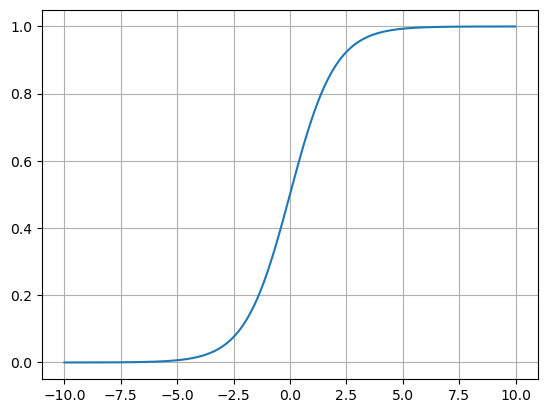

In [2]:
import matplotlib.pyplot as plt

plt.plot(z, g)
plt.grid(True)
plt.show()

#### Sigmoid 
시그모이드 함수는 S자 모양의 곡선을 갖는 수학적인 함수입니다. <p>
로지스틱 회귀에서 종종 사용되며, 입력 값을 확률로 변환하는 데에 이용됩니다. <p>
주로 이진 분류 문제에서 사용되며, 입력 변수의 선형 결합 결과를 확률로 변환하여 0과 1 사이의 값을 출력합니다.<p>

<br>

- 시그모이드 함수의 특징은 다음과 같습니다:<p>
- 범위: 시그모이드 함수의 출력 범위는 0과 1 사이입니다. 이는 확률을 나타내는데 유용하게 사용됩니다.<p>
- S자 모양: 입력 값이 아주 크거나 아주 작을 때는 함수의 기울기가 매우 작아집니다. 이는 입력 값이 극단적인 경우에도 함수의 출력이 0 또는 1에 가까워지도록 합니다.<p>
- 이진 분류: 시그모이드 함수는 이진 분류 문제에서 사용됩니다. 출력 값이 0.5보다 작으면 한 클래스로 분류되고, 0.5보다 크면 다른 클래스로 분류됩니다.<p>

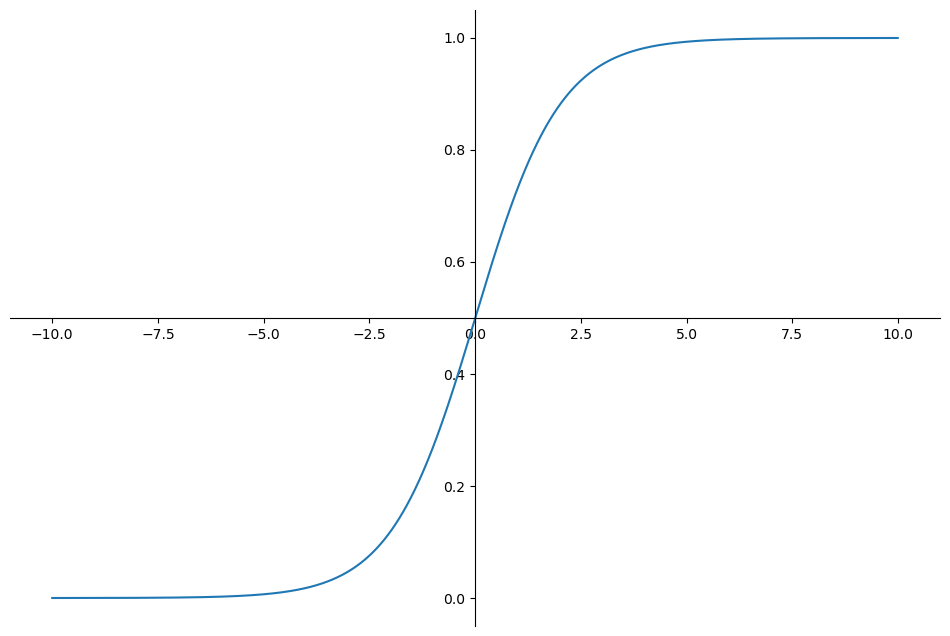

In [9]:
plt.figure(figsize=(12, 8))

ax = plt.gca()

ax.plot(z, g)

ax.spines['left'].set_position('zero') #축 설정 
ax.spines['bottom'].set_position('center') #축 설정 
ax.spines['right'].set_color('none') #축 설정 
ax.spines['top'].set_color('none') #축 설정 


plt.show()

### Logistic Reg 의 Cost Function

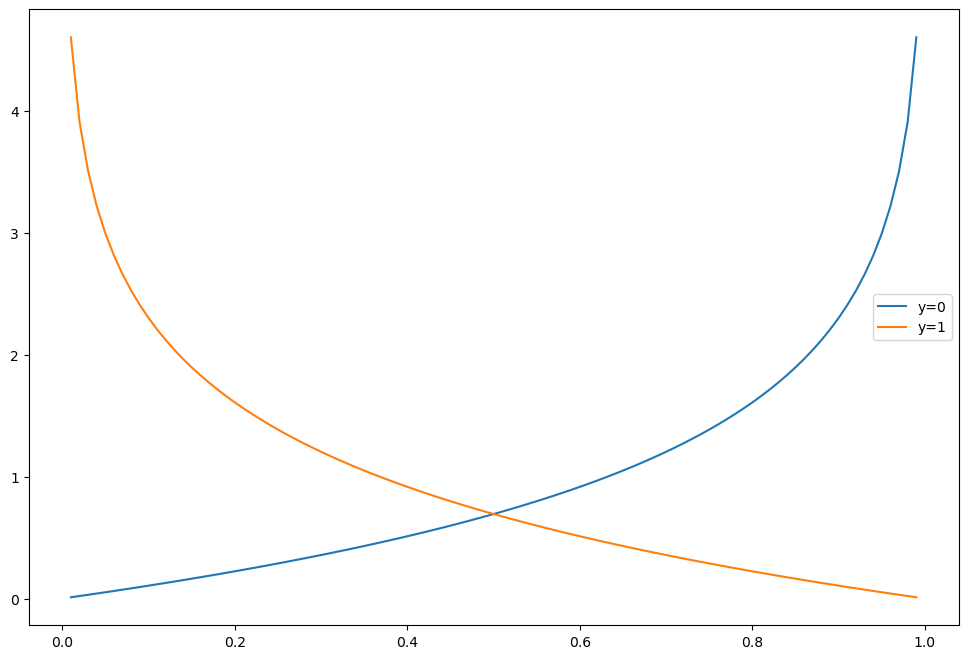

In [11]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label = 'y=0')
plt.plot(h, C1, label = 'y=1')
plt.legend()

plt.show()

#### 실습

In [12]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
wine['taste'] = [1 if grade>5 else 0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [14]:
from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)


#### 로지스틱 회귀 테스트

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train,y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [19]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train ACC : ',accuracy_score(y_train,y_pred_tr))
print('Test ACC : ', accuracy_score(y_pred_test, y_test))

Train ACC :  0.7427361939580527
Test ACC :  0.7438461538461538


### 파이프라인 구축

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [21]:
estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe = Pipeline(estimators)

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [23]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train ACC : ',accuracy_score(y_train,y_pred_tr))
print('Test ACC : ', accuracy_score(y_pred_test, y_test))

Train ACC :  0.7444679622859341
Test ACC :  0.7469230769230769


#### Decision Tree와 비교
-ROC를 이용한 성능평가를 수행하여 logistic Reg 가 더 성능이 좋다는걸 알 수 있다.

In [24]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [25]:
models = {
    'logistic regression':pipe,
    'decision tree' : wine_tree
}

In [26]:
from sklearn.metrics import roc_curve

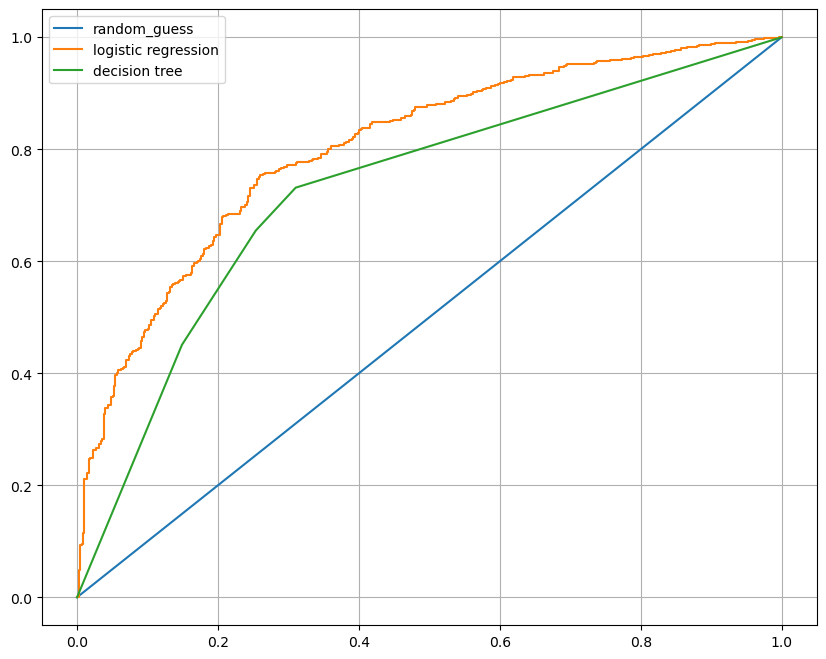

In [27]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], label='random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1] #1일 확률만 추출
    fpr, tpr, thresholds = roc_curve(y_test, pred)  #False Positive Rate (FPR), True Positive Rate (TPR), 임계값 (thresholds)
 
    plt.plot(fpr, tpr, label = model_name)

plt.grid(True)
plt.legend()
plt.show()


### PIMA 인디언 당뇨병 예측
```
임신 횟수 (Pregnancies): 여성이 임신한 횟수
포도당 부하 검사(Glucose): 2시간 동안의 경구 포도당 내용량 측정 값
혈압(BloodPressure): 이완기 혈압 (mm Hg)
피부 두께(SkinThickness): 삼두근 피부 주름 두께 (mm)
인슐린(Insulin): 2시간 혈청 인슐린 (mu U/ml)
체질량 지수(BMI): 체중(kg) / (신장(m))^2
당뇨병 가족력(DiabetesPedigreeFunction): 당뇨병 혈통 기능
나이(Age): 연령 (세)
당뇨병 여부(Outcome): 1(당뇨병 양성), 0(당뇨병 음성)
```

In [28]:
import pandas as pd 

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

PIMA = pd.read_csv(url)
PIMA.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


<Axes: >

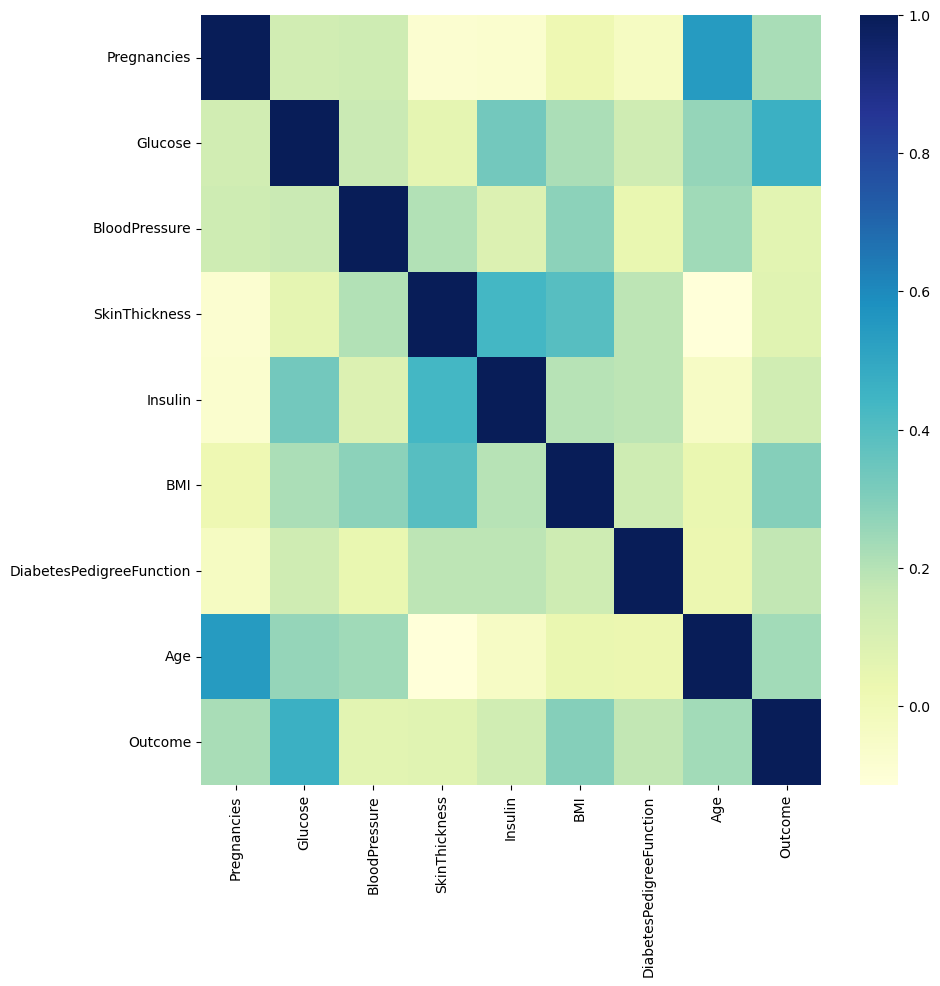

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(PIMA.corr(), cmap = 'YlGnBu')

#### 이상치 - 값이 0인 데이터 확인
- BloodPressure 35 -> 혈압이 0 


In [38]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

#### 의학적 지식과 PIMA 인디언에 대한 정보가 없으므로 일단 평균값으로 대체

In [39]:
zero_features=['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features]=PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = PIMA.drop(['Outcome'], axis=1)
y= PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=13)

In [43]:
estimators=[
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

#### 모델 평가

In [44]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, f1_score

In [45]:
print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC : ', roc_auc_score(y_test, pred))
print('F1 : ', f1_score(y_test, pred))


Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC :  0.7355555555555556
F1 :  0.6534653465346535


#### 다방면 방정식 계수 값 확인

In [50]:
coef = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [51]:
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [54]:
features = pd.DataFrame(
    {'Features' : labels,
     'importance' : coef}
)

features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [57]:
features['positive'] = features['importance']>0
features

,Features,importance,positive
4,Insulin,-0.162865,False
2,BloodPressure,-0.158401,False
3,SkinThickness,0.033947,True
7,Age,0.171960,True
0,Pregnancies,0.354266,True
6,DiabetesPedigreeFunction,0.366694,True
5,BMI,0.620405,True
1,Glucose,1.201424,True


In [59]:
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


#### 해석
- 포도당, BMI 등은 당뇨에 영향을 미치는 정도가 높다
- 혈압은 예측에 부정적 영향을 준다
- 연령이 BMI보다 출력 변수와 더 관련되어있지만, 모델은 BMI와 Glucose에 더 의존함 

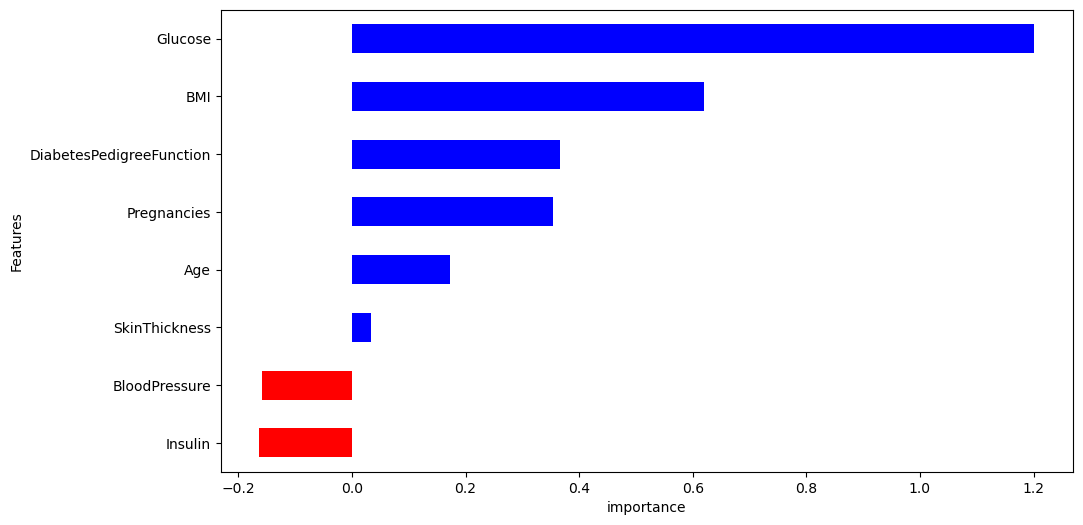

In [60]:
features['importance'].plot(kind = 'barh',
                            figsize=(11,6),
                            color = features['positive'].map({True: 'blue', False : 'red'}))

plt.xlabel('importance')
plt.show()